In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
feature = pd.read_csv('feature.csv', error_bad_lines=False)
feature = feature[feature.columns[0:2]]

In [2]:
# (1) cleaning the data
print(set([train[i].dtype for i in train.columns]))
#there're three kind of type: int64,float64 and object
print(train.select_dtypes(['object']).head())
feature[feature.name.isin(['dependency','edjefe','edjefa'])]

{dtype('int64'), dtype('float64'), dtype('O')}
             Id    idhogar dependency edjefe edjefa
0  ID_279628684  21eb7fcc1         no     10     no
1  ID_f29eb3ddd  0e5d7a658          8     12     no
2  ID_68de51c94  2c7317ea8          8     no     11
3  ID_d671db89c  2b58d945f        yes     11     no
4  ID_d56d6f5f5  2b58d945f        yes     11     no


,name,description
99,dependency,Dependency rate
100,edjefe,years of education of male head of household
101,edjefa,years of education of female head of household


In [3]:
train.dependency = train.dependency.replace({"yes": 1, "no": 0}).astype(np.float64)
train.edjefa = train.edjefa.replace({"yes": 1, "no": 0}).astype(np.float64)
train.edjefe = train.edjefe.replace({"yes": 1, "no": 0}).astype(np.float64)
#Now,the only 'object' data is 'idhogar'

In [4]:
print(train.select_dtypes(['object']).head())

             Id    idhogar
0  ID_279628684  21eb7fcc1
1  ID_f29eb3ddd  0e5d7a658
2  ID_68de51c94  2c7317ea8
3  ID_d671db89c  2b58d945f
4  ID_d56d6f5f5  2b58d945f


In [5]:
#(2) finding relationship between education and Target
edu_list = list(feature.name[100:112])+[feature.name[139]]
education = train[edu_list]
education.head()

,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,SQBmeaned
0,10.0,0.0,10.0,0,0,0,1,0,0,0,0,0,100.0
1,12.0,0.0,12.0,0,0,0,0,0,0,0,1,0,144.0
2,0.0,11.0,11.0,0,0,0,0,1,0,0,0,0,121.0
3,11.0,0.0,11.0,0,0,0,1,0,0,0,0,0,121.0
4,11.0,0.0,11.0,0,0,0,0,1,0,0,0,0,121.0


In [6]:
# edjefe,edjefa,meaneduc and SQBmeaned are float64. instlevel 1-9 are int64.
# look at the meaning of this part,we find that SQBmeaned is just the square of meaneduc, they are same.
feature.loc[list(range(100,112))+[139]]

,name,description
100,edjefe,years of education of male head of household
101,edjefa,years of education of female head of household
102,meaneduc,average years of education for adults (18+)
103,instlevel1,=1 no level of education
104,instlevel2,=1 incomplete primary
105,instlevel3,=1 complete primary
106,instlevel4,=1 incomplete academic secondary level
107,instlevel5,=1 complete academic secondary level
108,instlevel6,=1 incomplete technical secondary level
109,instlevel7,=1 complete technical secondary level


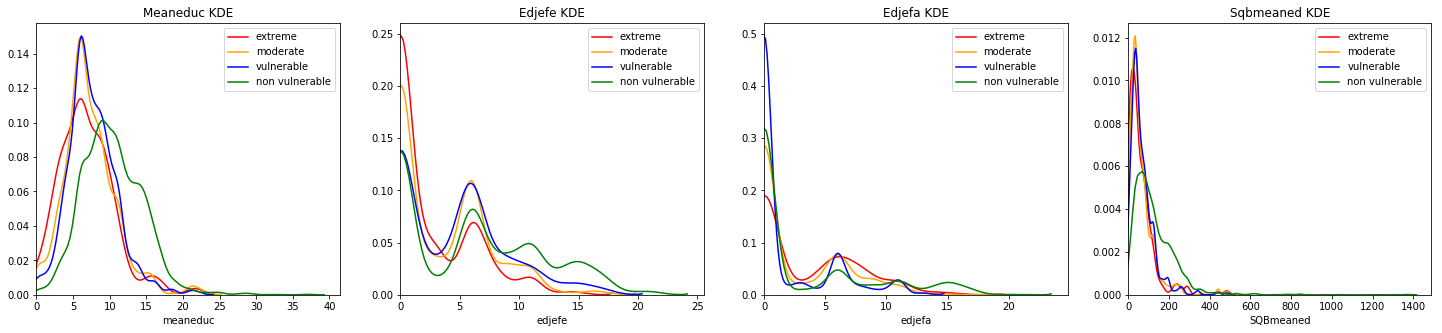

In [7]:
#Firstly,find the relationship between edjefe(float64),edjefa(float64),meaneduc(float64),SQBmeaned(float64) and target
plt.figure(figsize = (25, 5))
colors = dict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
label_mapping = dict({1: 'extreme', 2: 'moderate', 3: 'vulnerable',4: 'non vulnerable'})

for i, col in enumerate(['meaneduc','edjefe','edjefa','SQBmeaned']):
    ax = plt.subplot(1, 4, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # kernel density estimation
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = label_mapping[poverty_level])

    plt.title('%s KDE'%(col.capitalize()))
    plt.xlabel('%s'%col)
    ax.set_xlim(0)

# from the plot, we find that: There were a significant positive correlation between target and years of education of adult

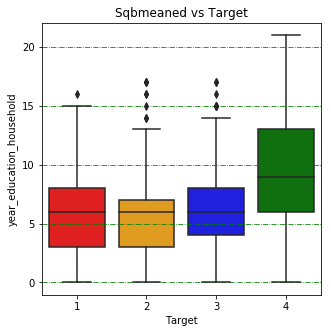

In [8]:
#secondly, using boxplot to find relationship between edjefe,edjefa and target.
#edjefe:years of education of male head of household    edjefa:years of education of female head of household
#key point: household, male, female
plt.figure(figsize = (11, 5))
household = train[train['parentesco1'] == 1].copy()
household['year_education_household'] = household['edjefa'] + household['edjefe'] 

ax = plt.subplot(1, 2, 1)
# boxplot colored by `Target`
sns.boxplot(x = 'Target', y = household['year_education_household'] , data = household , palette = colors)
plt.title('%s vs Target'%(col.capitalize()))
plt.grid(axis = 'y', color = 'green', linestyle ='-.')


#from the plot, we can get two conclusion:
#(1) There were a significant positive correlation between target and years of education of household
#(2) In every poverty-level family, the average years of education of female is a little bit larger that male's.

In [9]:
for poverty_level, color in colors.items():
    sns.violinplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
    ax = ax, color = color, label = label_mapping[poverty_level])

In [10]:
#Then,find the relationship between instlevel and target
instlevel1 = train.pop('instlevel1')
instlevel2 = train.pop('instlevel2')
instlevel3 = train.pop('instlevel3')
instlevel4 = train.pop('instlevel4')
instlevel5 = train.pop('instlevel5')
instlevel6 = train.pop('instlevel6')
instlevel7 = train.pop('instlevel7')
instlevel8 = train.pop('instlevel8')
instlevel9 = train.pop('instlevel9')

In [11]:
instlevel = (instlevel1+2*instlevel2+3*instlevel3+4*instlevel4+5*instlevel5+6*instlevel6+7*instlevel7+8*instlevel8+9*instlevel9)
train.insert(0,'instlevel',instlevel)
train['instlevel'].head()

0    4
1    8
2    5
3    4
4    5
Name: instlevel, dtype: int64

Text(0.5,0,'instlevel')

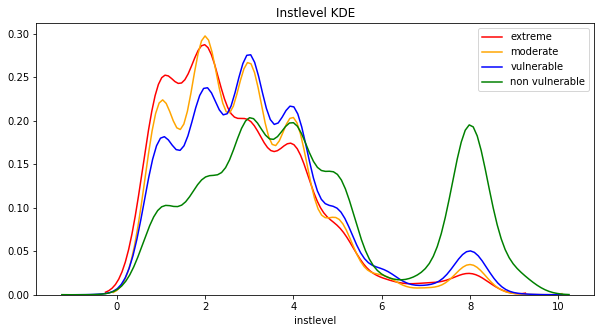

In [12]:
plt.figure(figsize = (10, 5))
colors = dict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
label_mapping = dict({1: 'extreme', 2: 'moderate', 3: 'vulnerable',4: 'non vulnerable'})

# Iterate through the poverty levels
for poverty_level, color in colors.items():
    # kernel density estimation
    sns.kdeplot(train.loc[train['Target'] == poverty_level, 'instlevel'].dropna(), 
                 color = color, label = label_mapping[poverty_level])

plt.title('%s KDE'%('instlevel'.capitalize()))
plt.xlabel('%s'% 'instlevel')
# from the plot, we find that: There were a significant positive correlation between target and education background

NameError: name 'line1' is not defined

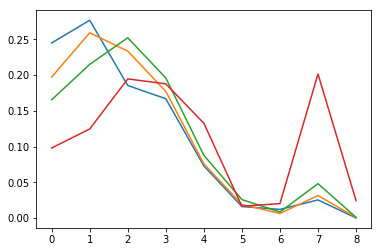

In [47]:
target1 = [sum(train[train['Target']==1]['instlevel'] == i)/sum(train['Target']==1) for i in range(1,10)]
target2 = [sum(train[train['Target']==2]['instlevel'] == i)/sum(train['Target']==2) for i in range(1,10)]
target3 = [sum(train[train['Target']==3]['instlevel'] == i)/sum(train['Target']==3) for i in range(1,10)]
target4 = [sum(train[train['Target']==4]['instlevel'] == i)/sum(train['Target']==4) for i in range(1,10)]

tar = [target1,target2,target3,target4]
tar = pd.DataFrame(tar).transpose()

fig, ax = plt.subplots()
tar[0].plot.line(ax=ax)
tar[1].plot.line(ax=ax)
tar[2].plot.line(ax=ax)
tar[3].plot.line(ax=ax)
ax.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
ax.set_title('level of education')

In [14]:
train.loc[train['Target'] == poverty_level, 'instlevel']

0       4
1       8
2       5
3       4
4       5
5       5
6       2
7       1
8       4
9       5
10      2
11      7
12      5
13      2
14      8
15      5
16      2
17      5
18      4
19      7
20      8
21      2
22      8
23      3
24      8
25      7
26      8
27      3
28      3
29      4
       ..
9502    4
9503    4
9504    3
9505    3
9507    5
9510    5
9511    8
9512    3
9513    3
9516    3
9517    5
9518    8
9519    5
9520    1
9521    3
9524    5
9525    1
9526    4
9527    1
9528    8
9529    3
9530    3
9531    2
9532    3
9533    4
9545    2
9546    3
9547    5
9548    5
9549    1
Name: instlevel, Length: 5996, dtype: int64

In [15]:
import preprocessing

In [16]:
hh_char = preprocessing.INECDataSet('household_characteristics').get_dataset()

Start to load data...
Processing... Please wait...


D:\anaconda\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
D:\anaconda\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [17]:
grp = hh_char.groupby('region')
grp.count()

,Category,Total,Quintil 1,Quintil 2,Quintil 3,Quintil 4,Quintil 5,year
region,,,,,,,,
Brunca,123,123,123,123,123,123,123,123
Central,123,123,123,123,123,123,123,123
Chorotega,123,123,123,123,123,123,123,123
Huetar Atlántica,123,123,123,123,123,123,123,123
Huetar Norte,123,123,123,123,123,123,123,123
Pacífico Central,123,123,123,123,123,123,123,123
Whole Costa Rica,123,123,123,123,123,123,123,123


In [18]:
average_school = grp.get_group('Average schooling people of years and older')
average_school['Total'] = average_school['Total'].astype('float')
average_school['Total']

KeyError: 'Average schooling people of years and older'

In [ ]:
df11 = grp.get_group('Per capita income per household')
df22 = grp.get_group('Average household income per capita')
frames = [df11, df22]
average_income_household_person = pd.concat(frames)
average_income_household_person['Total'] = average_income_household_person['Total'].astype('float')
average_income_household_person['Quintil 1'] = average_income_household_person['Quintil 1'].astype('float')
average_income_household_person['Quintil 2'] = average_income_household_person['Quintil 2'].astype('float')
average_income_household_person['Quintil 3'] = average_income_household_person['Quintil 3'].astype('float')
average_income_household_person['Quintil 4'] = average_income_household_person['Quintil 4'].astype('float')
average_income_household_person['Quintil 5'] = average_income_household_person['Quintil 5'].astype('float')
#print(average_income_household['Total'].values)
average_income_household_person.head()

In [ ]:
df1 = grp.get_group('Income per household')
df2 = grp.get_group('Average income per household')
df3 = grp.get_group('Average total household income')
frames = [df1, df2, df3]
average_income_household = pd.concat(frames)
average_income_household['Total'] = average_income_household['Total'].astype('float')
average_income_household['Quintil 1'] = average_income_household['Quintil 1'].astype('float')
average_income_household['Quintil 2'] = average_income_household['Quintil 2'].astype('float')
average_income_household['Quintil 3'] = average_income_household['Quintil 3'].astype('float')
average_income_household['Quintil 4'] = average_income_household['Quintil 4'].astype('float')
average_income_household['Quintil 5'] = average_income_household['Quintil 5'].astype('float')
#print(average_income_household['Total'].values)
average_income_household.head()

In [ ]:
#sns.boxplot(x = 'year', y = 'Total' , data = average_income_household)
plt.figure(figsize = (15, 5))
ax = plt.subplot(1, 3, 1)
sns.lineplot(x="year", y="Total", hue="region" ,data = average_income_household)
plt.title('average household income')
ax = plt.subplot(1, 3, 2)
sns.lineplot(x="year", y="Total", hue="region" ,data = average_income_household_person)
plt.title('average household income per person ')
ax = plt.subplot(1, 3, 3)
sns.lineplot(x="year", y="Total", hue="region" ,data = average_school)
plt.title('Average schooling people of years')

In [ ]:
plt.figure(figsize = (25, 20))
for i, col in enumerate(['Quintil 1','Quintil 2','Quintil 3','Quintil 4','Quintil 5']):
    ax = plt.subplot(2, 3, i + 1)
    sns.lineplot(x="year", y=col, hue="region" ,data = average_income_household)
    plt.title('%s lineplot'%(col.capitalize()))
    plt.xlabel('%s'%col)